<a href="https://colab.research.google.com/github/aanilkumarreddy/DataDiggers/blob/main/dataOptimizationNFLX_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [ ]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('NFLX', data_source='yahoo', start='2018-01-01', end = "2021-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,201.649994,195.419998,196.100006,201.070007,10966900,201.070007
2018-01-03,206.210007,201.500000,202.050003,205.050003,8591400,205.050003
2018-01-04,207.050003,204.000000,206.199997,205.630005,6029600,205.630005
2018-01-05,210.020004,205.589996,207.250000,209.990005,7033200,209.990005
2018-01-08,212.500000,208.440002,210.020004,212.050003,5580200,212.050003


In [ ]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2018-01-02,201.070007
2018-01-03,205.050003
2018-01-04,205.630005
2018-01-05,209.990005
2018-01-08,212.050003


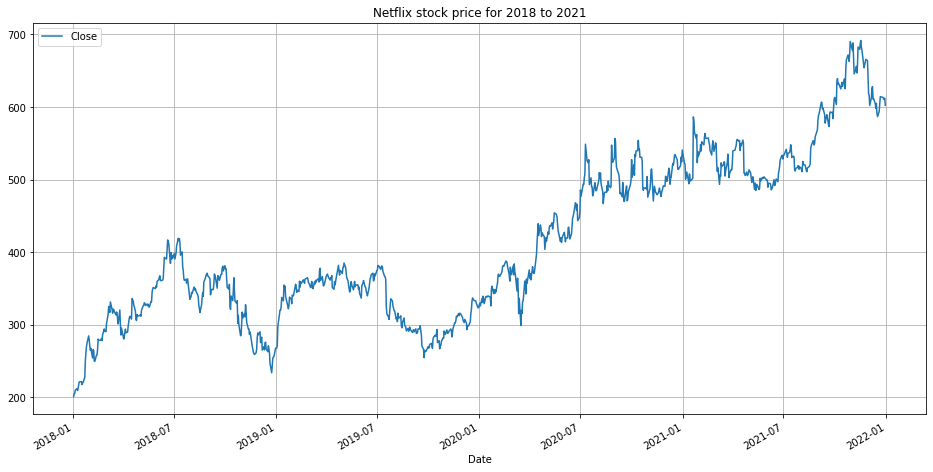

In [ ]:
df.plot(figsize=(16,8), title = "Netflix stock price for 2018 to 2021", grid = True)

In [ ]:
#Simple Moving Average

df['SMA_1'] = df.Close.rolling(7, min_periods=1).mean() #Period of 1 week
df['SMA_2'] = df.Close.rolling(14, min_periods=1).mean() #Period of 2 weeks
df['SMA_4'] = df.Close.rolling(28, min_periods=1).mean() #Period of 4 weeks

In [ ]:
#Cumulative Moving Average

df['CMA'] = df.Close.expanding().mean()

In [ ]:

df['EMA_0.1'] = df.Close.ewm(alpha=0.1, adjust=False).mean() #Smoothing factor - 0.1
df['EMA_0.3'] = df.Close.ewm(alpha=0.3, adjust=False).mean() #Smoothing factor - 0.3

In [ ]:
df[2:]

,Close,SMA_1,SMA_2,SMA_4,CMA,EMA_0.1,EMA_0.3
Date,,,,,,,
2018-01-04,205.630005,203.916672,203.916672,203.916672,203.916672,201.884207,203.273806
2018-01-05,209.990005,205.435005,205.435005,205.435005,205.435005,202.694787,205.288666
2018-01-08,212.050003,206.758005,206.758005,206.758005,206.758005,203.630308,207.317067
2018-01-09,209.309998,207.183337,207.183337,207.183337,207.183337,204.198277,207.914946
2018-01-10,212.520004,207.945718,207.945718,207.945718,207.945718,205.030450,209.296464
...,...,...,...,...,...,...,...
2021-12-27,613.119995,602.557138,607.272138,629.775358,412.649482,615.336675,608.710855
2021-12-28,610.710022,605.364284,606.209996,627.036429,412.846557,614.874010,609.310605
2021-12-29,610.539978,608.765712,604.957136,624.138214,413.043071,614.440607,609.679417


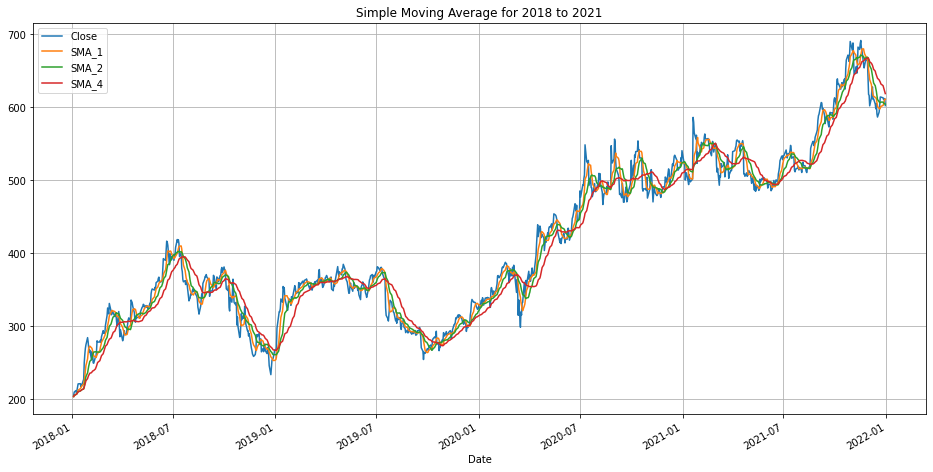

In [ ]:

df[2:][['Close', 'SMA_1', 'SMA_2', 'SMA_4']].plot(figsize=(16,8), title = "Simple Moving Average for 2018 to 2021", grid = True)

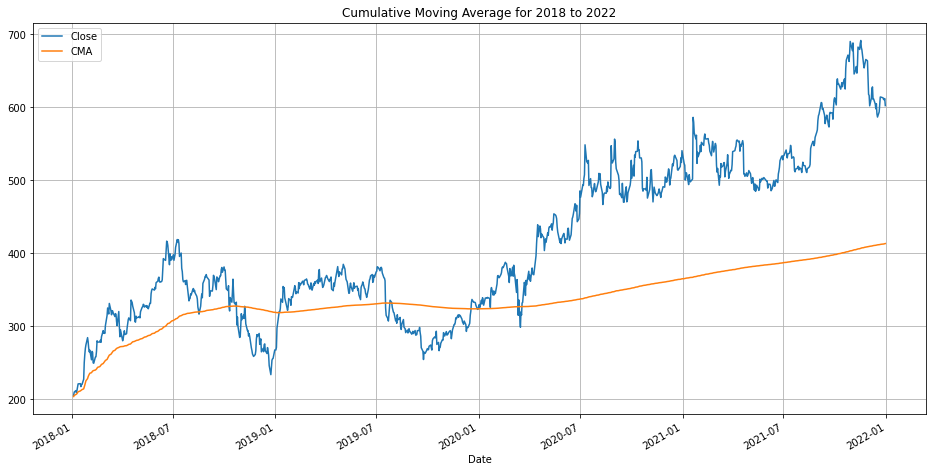

In [ ]:
#Plotting Cumulative Moving Average for 2017 to 2019

df[2:][['Close', 'CMA']].plot(figsize=(16,8), title = "Cumulative Moving Average for 2018 to 2022", grid = True)

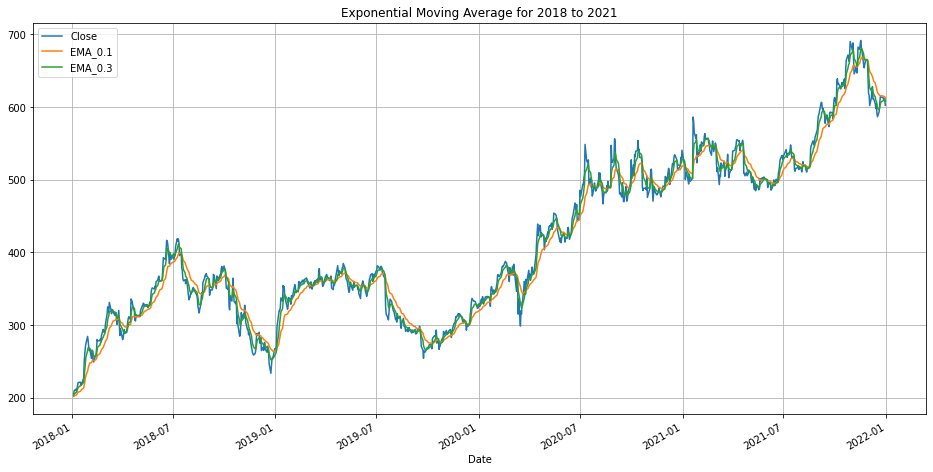

In [ ]:
#Plotting Exponential Moving Average for 2017 to 2019

df[2:][['Close', 'EMA_0.1', 'EMA_0.3']].plot(figsize=(16,8), title = "Exponential Moving Average for 2018 to 2021", grid = True)

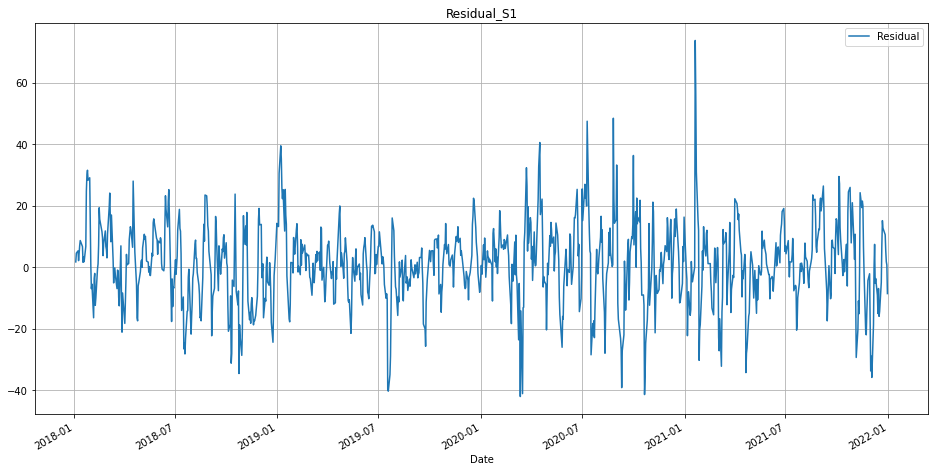

In [ ]:
#Residual (Error) for SMA_1

res = df[2:]['Close'] - df[2:]['SMA_1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S1', figsize=(16,8), grid = True)

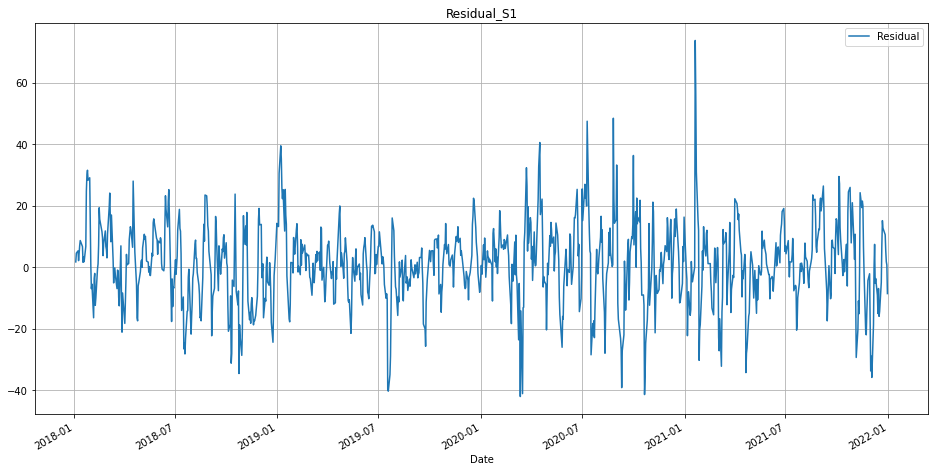

In [ ]:
#Residual (Error) for SMA_1

res = df[2:]['Close'] - df[2:]['SMA_1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S1', figsize=(16,8), grid = True)

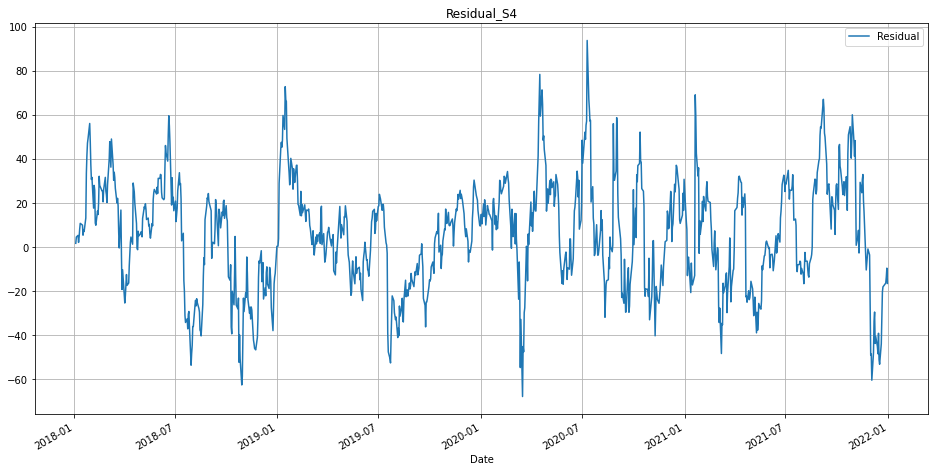

In [ ]:
#Residual (Error) for SMA_4

res = df[2:]['Close'] - df[2:]['SMA_4']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S4', figsize=(16,8), grid = True)

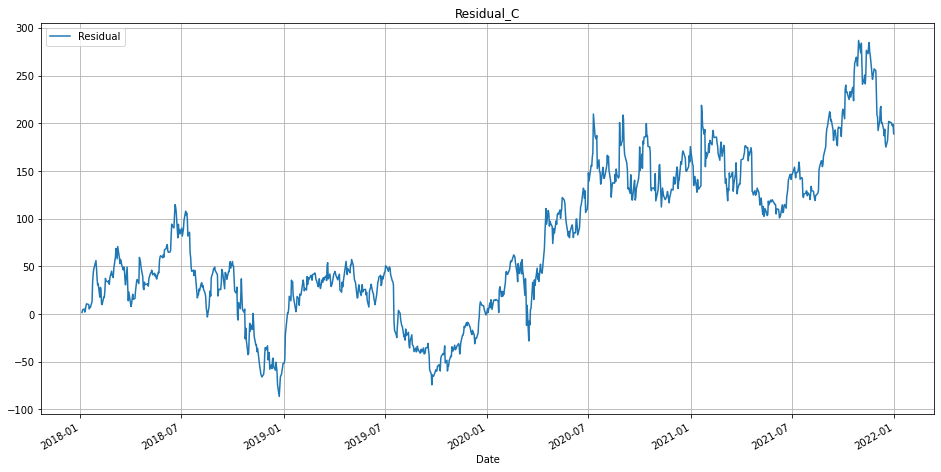

In [ ]:
#Residual (Error) for CMA

res = df[2:]['Close'] - df[2:]['CMA']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_C', figsize=(16,8), grid = True)

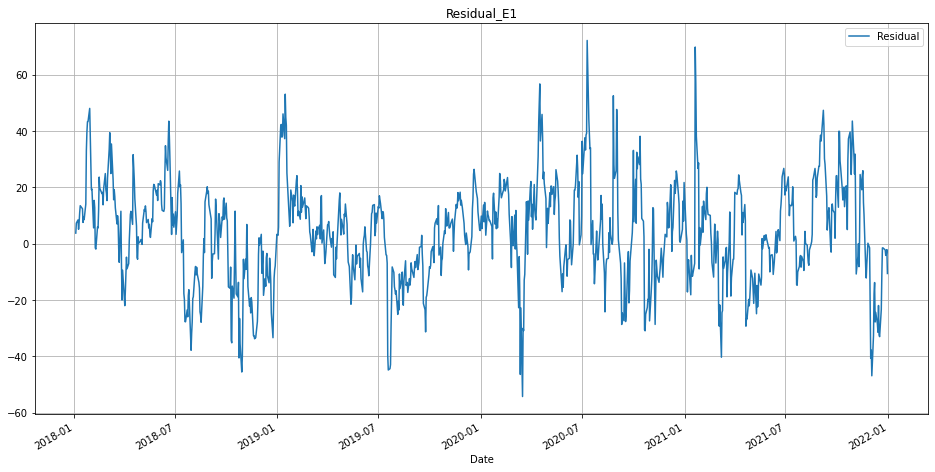

In [ ]:
#Residual (Error) for EMA_0.1

res = df[2:]['Close'] - df[2:]['EMA_0.1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E1', figsize=(16,8), grid = True)

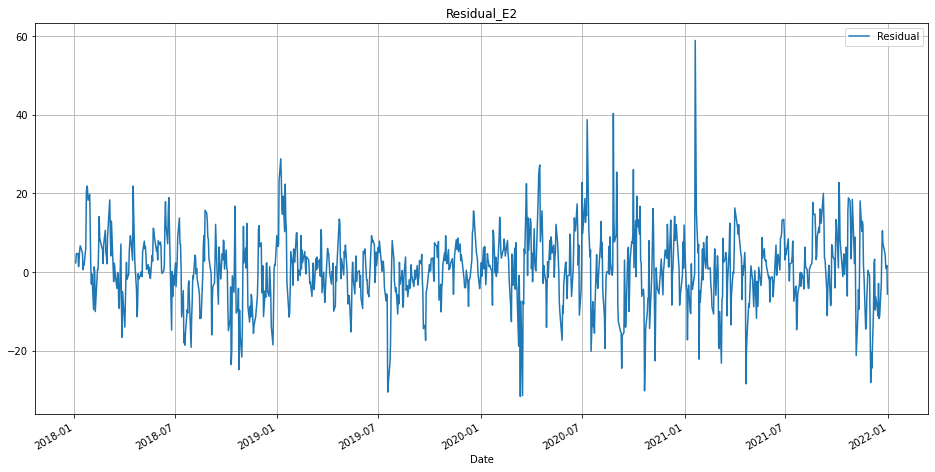

In [ ]:
#Residual (Error) for EMA_0.3

res = df[2:]['Close'] - df[2:]['EMA_0.3']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E2', figsize=(16,8), grid = True)

In [ ]:
df["S1"] = df[2:]['Close'] - df[2:]['SMA_1']
df["S2"] = df[2:]['Close'] - df[2:]['SMA_2']
df["S4"] = df[2:]['Close'] - df[2:]['SMA_4']

df["C"] = df[2:]['Close'] - df[2:]['CMA']

df["E1"] = df[2:]['Close'] - df[2:]['EMA_0.1']
df["E3"] = df[2:]['Close'] - df[2:]['EMA_0.3']

In [ ]:
df[2:].mean()[7:]

S1     1.207241
S2     2.590064
S4     5.325986
C     76.328873
E1     3.681957
E3     0.941103
dtype: float64

In [ ]:
#Root Mean Square Error(RMSE)

print("Root Mean Square Error for SMA_1:", round(np.sqrt(np.mean((df["S1"] ** 2))), 5))
print("Root Mean Square Error for SMA_2:", round(np.sqrt(np.mean((df["S2"] ** 2))), 5))
print("Root Mean Square Error for SMA_4:", round(np.sqrt(np.mean((df["S4"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for CMA:", round(np.sqrt(np.mean((df["C"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for EMA_1:", round(np.sqrt(np.mean((df["E1"] ** 2))), 5))
print("Root Mean Square Error for EMA_3:", round(np.sqrt(np.mean((df["E3"] ** 2))), 5))

Root Mean Square Error for SMA_1: 13.07852
Root Mean Square Error for SMA_2: 18.47489
Root Mean Square Error for SMA_4: 25.40547
Root Mean Square Error for CMA: 110.74795
Root Mean Square Error for EMA_1: 18.20289
Root Mean Square Error for EMA_3: 9.32534


In [ ]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2:]['Close']
predictions = df[2:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 86.96198766158163
Mean Absolute Error(MAE): 6.881990784166561
Root Mean Square Error (RMSE): 9.325341155238323
